# Emozo Experiment Variance Analysis

We wanted to take a look at emotion by studying variance throughout the survey to provide a different perspective on Emozo's facial coding technology. An interval with lower variance can indicate that a person’s emotion is static while an interval with higher variance can indicate that a person is outputting a higher emotional response. So, it seems that there was definitely an increase in a happy response in the image survey and an increase in sad response in the video survey despite the thresholds being reached only a fraction of the time. 

We looked at variance because a study published by the National Library of Medicine, ['Measures of emotion: A review' by Iris B. Mauss and Michael D. Robinson](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2756702/), concluded that emotional responses are more reliably correlated to dimensions such as arousal and valence (positivity vs. negativity) rather than discrete emotional states like happiness and sadness. This explains why we see fluctuations in our output but can also explain why sadness may be present in our respondents despite not exceeding the thresholds demonstrated in our primary analysis. 


## Data Preparation

In [211]:
import copy
import pandas as pd
import statistics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [212]:
# image survey data

image_data = pd.read_csv('emozo_image_results.csv')
cols = []
for x in range(1,21):
    if x < 10:
        cols.append(f"Happy - 0{x} - emozo_image_video.mp4_0_0")
    else:
        cols.append(f"Happy - {x} - emozo_image_video.mp4_0_0")
image_df = image_data[cols]
image_df = image_df.dropna()


In [213]:
# video survey data

video_data = pd.read_csv('emozo_video_results.csv')
cols = []
for x in range(1,67):
    if x < 10:
        cols.append(f"Sad - 0{x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0")
    else:
        cols.append(f"Sad - {x} - Y2Mate.is - Back-To-School Essentials  Sandy Hook Promise-b5ykNZl9mTQ-1080p-1658230653426.mp4_0_0")

video_df = video_data[cols]
video_df = video_df.dropna()


## Variance and Percent Change Functions

In [214]:
def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)


In [215]:
def percent_change(x, t):
    a = sum(x[:t]) / len(x[:t])
    b = sum(x[t:]) / len(x[t:])
    print('neutral baseline:', a, 'stiumulus baseline:', b)
    
    return (b - a) / a


## Image Survey (+51.08% Variance)

neutral baseline: 0.008768064034225 stiumulus baseline: 0.013247101390587518


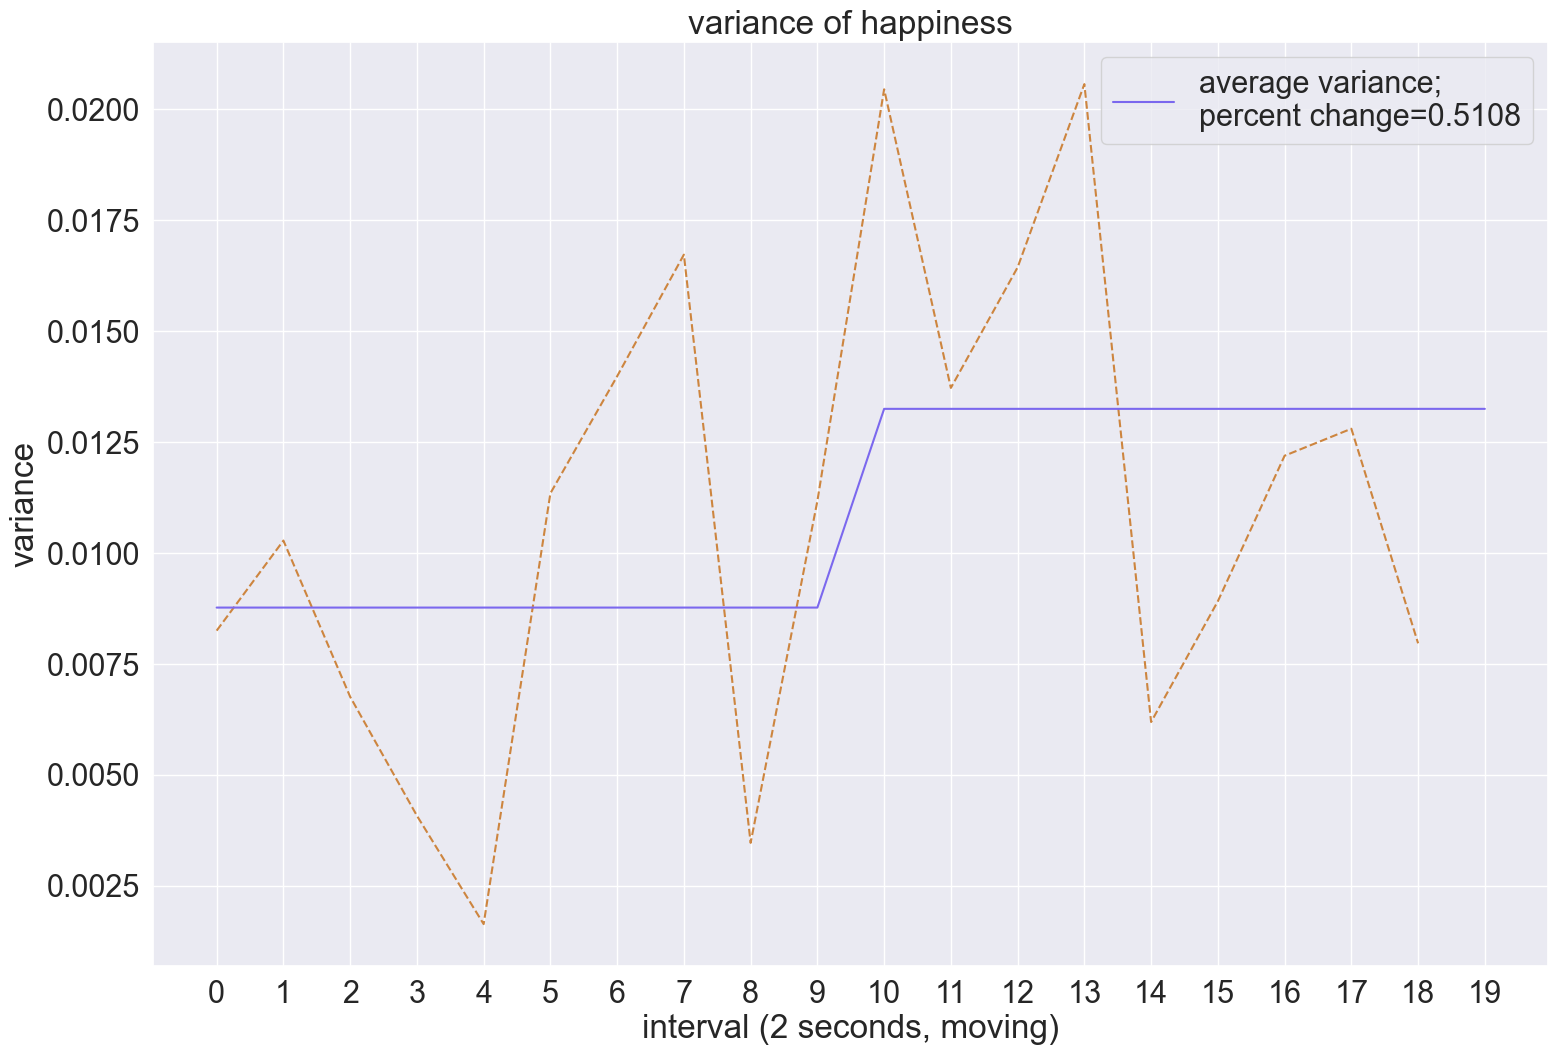

In [219]:
sns.set_style("darkgrid")
sns.set(font_scale=2)

var_list = []
# for each respondent
for x in range(len(image_df)):
    
    # list of variances for every 2 seconds for one respondent
    indv_var = []
    
    # for each 2 second section
    for i in range(19):
        section = image_df.iloc[x,0+i:2+i]
        
        # variance for that respondent
        var = variance(section, ddof=1)
        indv_var.append(var)
        
    # list of all respondents
    var_list.append(indv_var)

# columns are time (2 second intervals), rows are respondents, data is variance
var_df = pd.DataFrame(var_list)

# thresholds
neutral = sum(list(var_df.mean())[:10]) / 10
dog = sum(list(var_df.mean())[10:]) / 9

# average variance of all respondents for each interval
plt.plot(list(var_df.mean()), '--', color='peru')

# average variance of neutral period and average of stimulus period
p = []
for i in range(10):
    p.append(neutral)
for i in range(10):
    p.append(dog)
    
x = var_df.mean()
y = percent_change(x, 10)
plt.plot([i for i in range(20)], p, color='mediumslateblue', 
         label=f'average variance; \npercent change={round(y,4)}')

# plot labels
plt.gcf().set_size_inches(18,12)
plt.xticks([i for i in range(20)])
plt.xlabel('interval (2 seconds, moving)')
plt.ylabel('variance')
plt.title('variance of happiness')
plt.legend()



In this graph, the dotted line is the variance averaged out among all respondents across 2 second moving intervals throughout the video. The solid purple line shows the average variance for the first 10 seconds during the neutral image and the jump switches to the average variance for the last 10 seconds during the stimulus image. There was a 51.1% increase in variance from the neutral image to the stimulus image. 

## Video Survey (+51.21% Variance)

neutral baseline: 0.011976104323357904 stiumulus baseline: 0.01810889042532062


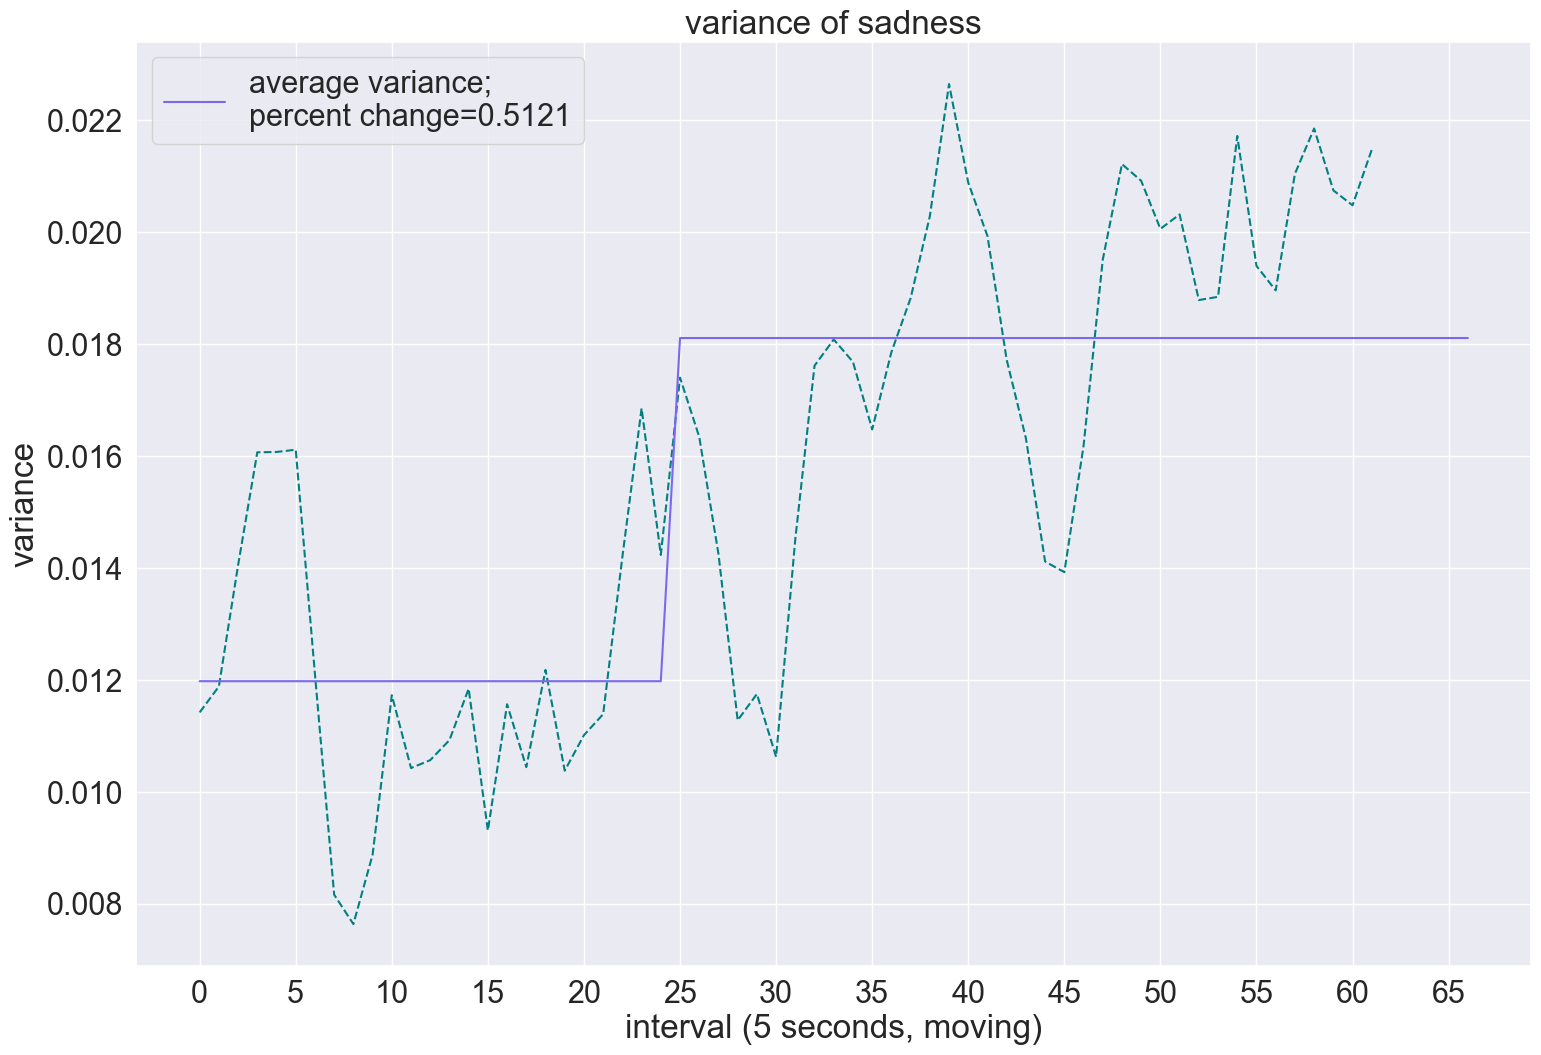

In [220]:
sns.set(font_scale=2)

var_list = []
# for each respondent
for x in range(len(video_df)):
    
    # list of variances for every 2 seconds for one respondent
    indv_var = []
    
    # for each 5 second section
    for i in range(62):
        section = video_df.iloc[x,0+i:5+i].values
        
        # variance for that respondent
        var = variance(section, ddof=1)
        indv_var.append(var)
        
    # list of all respondents
    var_list.append(indv_var)

# columns are time (2 second intervals), rows are respondents, data is variance
var_df = pd.DataFrame(var_list)

# thresholds
t = 25
neut = sum(list(var_df.mean())[:t]) / len(list(var_df.mean())[:t])
stim = sum(list(var_df.mean())[t:]) / len(list(var_df.mean())[t:])

# average variance of all respondents for each interval
plt.plot(list(var_df.mean()), '--', color='teal')

# average variance of neutral period and average of stimulus period
p = []
for i in range(25):
    p.append(neut)
for i in range(42):
    p.append(stim)
    
x = var_df.mean()
y = percent_change(x, 25)
plt.plot([i for i in range(67)], p, color='mediumslateblue', 
         label=f'average variance; \npercent change={round(y,4)}')

# plot labels
plt.gcf().set_size_inches(18,12)
plt.xticks(np.linspace(0,65,14))
plt.xlabel('interval (5 seconds, moving)')
plt.ylabel('variance')
plt.title('variance of sadness')
plt.legend()


This graph show variance in 5 second moving intervals because the video is longer than the image survey. There was a 51.2% increase in average variance from the start of the video up to the first spike of sadness that Aayush highlighted earlier and onward. We think that for future experiments, this 51% can be used as a baseline measurement of variance to further examine emotional changes detected by emozo’s software. 